### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

### Analyzing the data

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# We see there are 3 columns with large values and hence we will now normalize them
column='age'
print(df[column].abs().max())
df[column] = df[column] /df[column].abs().max()
max_age = df[column].abs().max()

77


In [ ]:
column='trtbps'
print(df[column].abs().max())
df[column] = df[column] /df[column].abs().max()
max_trtbps = df[column].abs().max()

200


In [ ]:
column='chol'
print(df[column].abs().max())
df[column] = df[column] /df[column].abs().max()
max_chol = df[column].abs().max()

564


In [ ]:
column='thalachh'
print(df[column].abs().max())
df[column] = df[column] /df[column].abs().max()
max_thalachh = df[column].abs().max()

202


In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.818182,1,3,0.725,0.413121,1,0,0.742574,0,2.3,0,0,1,1
1,0.480519,1,2,0.650,0.443262,0,1,0.925743,0,3.5,0,0,2,1
2,0.532468,0,1,0.650,0.361702,0,0,0.851485,0,1.4,2,0,2,1
3,0.727273,1,1,0.600,0.418440,0,1,0.881188,0,0.8,2,0,2,1
4,0.740260,0,0,0.600,0.627660,0,1,0.806931,1,0.6,2,0,2,1
5,0.740260,1,0,0.700,0.340426,0,1,0.732673,0,0.4,1,0,1,1
6,0.727273,0,1,0.700,0.521277,0,0,0.757426,0,1.3,1,0,2,1
7,0.571429,1,1,0.600,0.466312,0,1,0.856436,0,0.0,2,0,3,1
8,0.675325,1,2,0.860,0.352837,1,1,0.801980,0,0.5,2,0,3,1
9,0.740260,1,2,0.750,0.297872,0,1,0.861386,0,1.6,2,0,2,1


All values were already encoded

There were no null values found

Hence only normalization was done as data preprocessing

In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

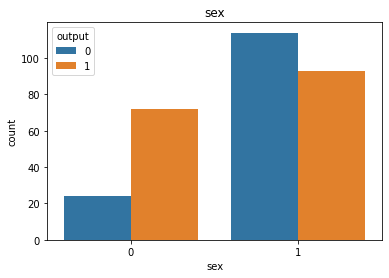

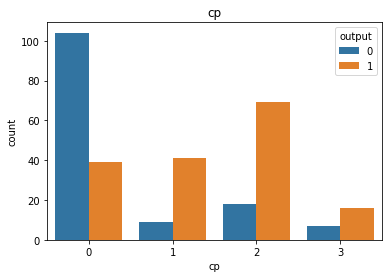

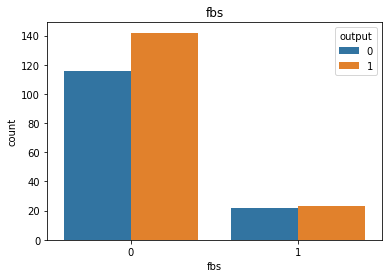

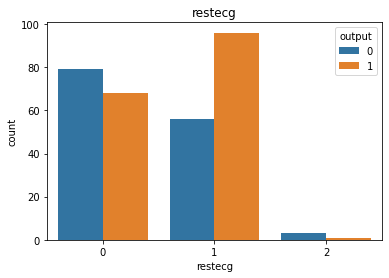

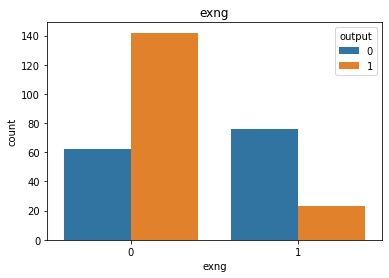

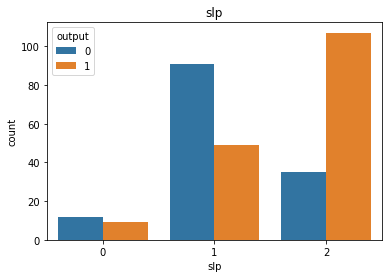

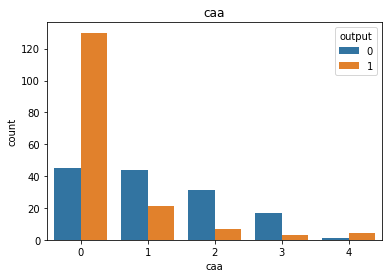

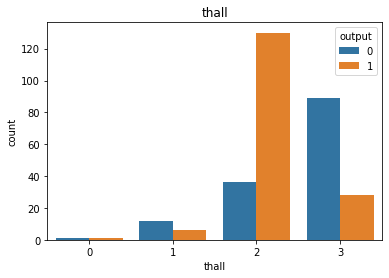

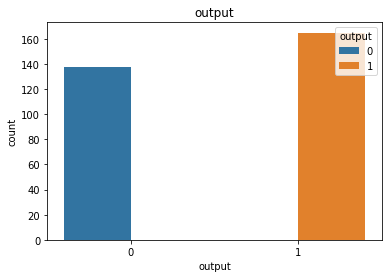

In [ ]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

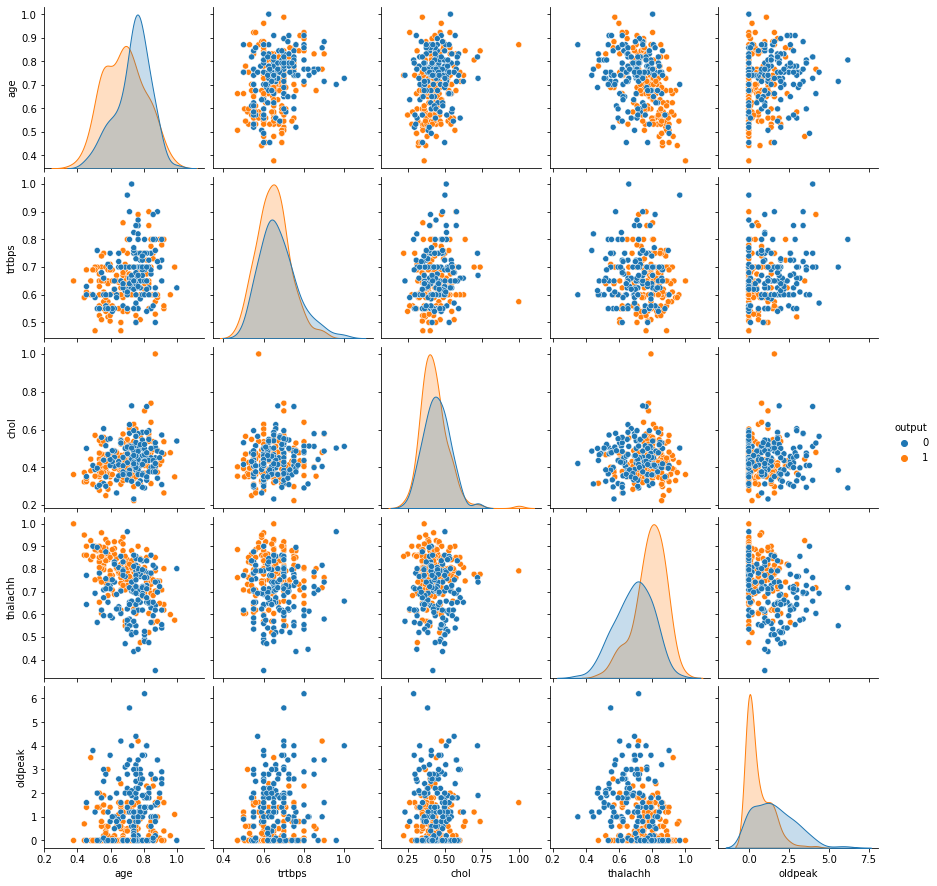

In [ ]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

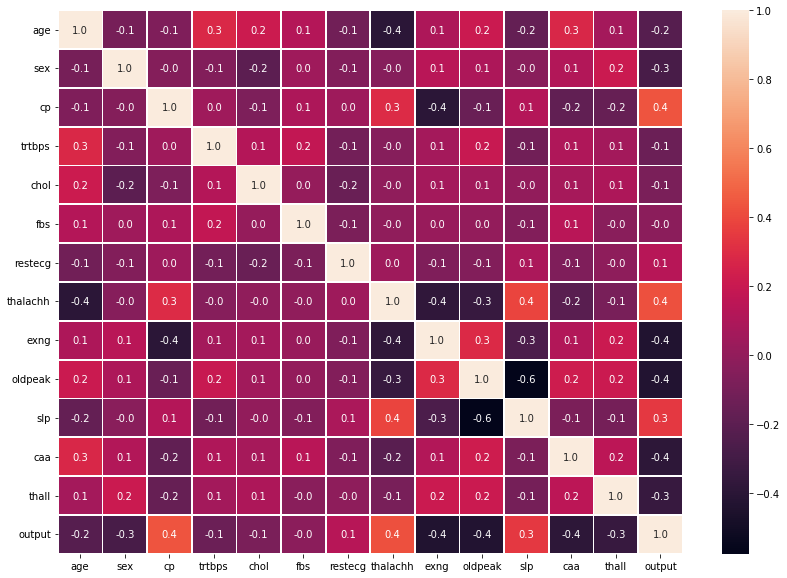

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

# Logistic Regression Prediction



In [ ]:
Y = df['output']
X = df.drop(['output'], axis=1)

In [ ]:
# Splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=45)

In [ ]:
y_train

145    1
84     1
282    0
89     1
40     1
      ..
163    1
213    0
95     1
32     1
131    1
Name: output, Length: 212, dtype: int64

In [ ]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (212, 13)
X_test: (91, 13)
y_train: (212,)
y_test: (91,)


In [ ]:
model = LogisticRegression(max_iter = 900, solver = 'lbfgs')

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=900)

In [ ]:
y_pred = model.predict(X_test)
print(X_test)
y_pred

          age  sex  cp  trtbps      chol  fbs  restecg  thalachh  exng  \
104  0.649351    1   2   0.645  0.347518    0        1  0.806931     0   
100  0.545455    1   3   0.740  0.432624    0        0  0.881188     0   
125  0.441558    0   1   0.590  0.372340    0        1  0.950495     0   
69   0.805195    0   0   0.620  0.370567    0        1  0.806931     0   
83   0.675325    1   3   0.760  0.528369    1        1  0.881188     0   
..        ...  ...  ..     ...       ...  ...      ...       ...   ...   
118  0.597403    0   1   0.525  0.361702    0        1  0.851485     0   
191  0.753247    1   0   0.640  0.382979    0        0  0.648515     1   
159  0.727273    1   1   0.650  0.391844    0        0  0.806931     0   
228  0.766234    1   3   0.850  0.510638    0        0  0.787129     0   
231  0.740260    1   0   0.825  0.512411    1        0  0.613861     0   

     oldpeak  slp  caa  thall  
104      0.0    2    0      2  
100      0.8    2    2      2  
125      0.7   

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0])

In [ ]:
cr1 = accuracy_score(y_test, y_pred)
print(cr1*100,"% Accuracy")

83.51648351648352 % Accuracy


# Prediction Using Support Vector Machine

In [ ]:
svm_model = SVC(kernel='linear', max_iter=500, C=0.01)

In [ ]:
svm_model.fit(X_train,y_train)

SVC(C=0.01, kernel='linear', max_iter=500)

In [ ]:
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0])

In [ ]:
cr1 = accuracy_score(y_test, y_pred)
print(cr1*100,"% Accuracy")

80.21978021978022 % Accuracy


In [ ]:
svm_model.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 500,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
svm_model.coef_[0]

array([-0.02525122, -0.18254679,  0.32969287, -0.01343615, -0.00807598,
       -0.02745321,  0.04254679,  0.05412333, -0.20223966, -0.31808835,
        0.19193253, -0.34459929, -0.13      ])

In [ ]:
svm_model.intercept_

array([0.69620397])

In [ ]:
svm_model.n_features_in_

13

In [ ]:
svm_model.fit_status_

0

# Prediction Using Random Forest Classifier

In [ ]:
Y = df[['output']]
X = df.drop(['output'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.5, random_state=45)

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=500, criterion='gini')

In [ ]:
random_forest_model.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=500)

In [ ]:
pickle.dump(random_forest_model, open('random_forest_model.pkl', 'wb'))

In [ ]:
y_pred = random_forest_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
cr1 = accuracy_score(y_test, y_pred)
print(cr1*100,"% Accuracy")

81.57894736842105 % Accuracy


# Menu Driven

In [ ]:
# # age	sex	cp	trtbps	chol	fbs	restecg	thalachh	exng	oldpeak	slp	caa	thall
categorical_list = ["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall"]
new = pd.DataFrame(columns=categorical_list)
age = int(input('Enter age: '))/max_age
sex = int(input('Enter sex (1=Male, 0=Female):'))
cp = int(input('Chest Pain? (1,2,3):'))
trtbps = int(input('Resting blood pressure (in mm Hg): '))/max_trtbps
chol = int(input('Cholestoral in mg/dl fetched via BMI sensor '))/max_chol
fbs = int(input('Enter fasting blood sugar > 120 mg/dl (1 = true; 0 = false): '))
restecg = input('Resting electrocardiographic results')
thalachh = int(input('Maximum heart rate achieved: '))/max_thalachh
exng = int(input('Exercise induced angina (1 = yes; 0 = no)'))
oldpeak = int(input('Enter Previous peak: '))
slp = int(input('Enter Slope: '))
caa = int(input('Enter number of major vessels (0-3)'))
thall = int(input('Enter Thal rate: (0,1,2,3)'))
new.loc[0] = [age, sex, cp, trtbps, chol , fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall]

Enter age: 63
Enter sex (1=Male, 0=Female):1
Chest Pain? (1,2,3):3
Resting blood pressure (in mm Hg): 145
Cholestoral in mg/dl fetched via BMI sensor 233
Enter fasting blood sugar > 120 mg/dl (1 = true; 0 = false): 1
Resting electrocardiographic results0
Maximum heart rate achieved: 150
Exercise induced angina (1 = yes; 0 = no)0
Enter Previous peak: 2.3
Enter Slope: 0
Enter number of major vessels (0-3)0
Enter Thal rate: 1


In [ ]:
new 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [ ]:
print('1. Logistical Regression')
print('2. Support Vector Machine')
print('3. Random Forest')
opt = int(input('Enter the type of classification you would want to run: '))

1. Logistical Regression
2. Support Vector Machine
3. Random Forest
Enter the type of classification you would want to run: 1


In [ ]:
new['age'] = new['age']/max_age
new['trtbps'] = new['trtbps']/max_trtbps
new['chol'] = new['chol']/max_chol
new['thalachh'] = new['thalachh']/max_thalachh

In [ ]:
# menu driven part...still a work in progress
if opt == 1:
  output = model.predict(new)
  
elif opt == 2:
  output = svm_model.predict(new)

elif opt == 3:
  output = random_forest_model.predict(new)

In [ ]:
if output==1:
    print("Yes, the person has had or is prone to a heart disease")
else:
    print("No, the person does not have or is not prone to heart disease")

Yes, the person has had or is prone to a heart disease


### Conclusion: 
We have implemented 3 models and we understand the best one working here is Logistic Regression.
